In [2]:
# --- LIBRERÍAS ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# --- CONFIGURACIÓN DE PANDAS ---
pd.set_option('display.max_columns', None)

# --- CARGA DE DATOS ---
clients = pd.read_csv('../DATA/clients_202510280926.csv')
orders = pd.read_csv('../DATA/orders_202510280929.csv')
products = pd.read_csv('../DATA/products_202510280931.csv')

# --- VERIFICAR ---
print("Clientes:", clients.shape)
print("Órdenes:", orders.shape)
print("Productos:", products.shape)

# --- VISTAS RÁPIDAS ---
display(clients.head())
display(orders.head())
display(products.head())


Clientes: (2357, 15)
Órdenes: (82245, 10)
Productos: (1255, 6)


,client_id,first_name,last_name,gender,age,email,city,address,postal_code,country,citizenship,document_type,document_number,registration_date,last_seen
0,21e5c13d-1c9a-4d00-9164-b72302d5edef,Tristán,Rojas,M,42,tristán.rojas13@example.com,Rivera,Bulevar Artigas 3757,28289,Uruguay,Uruguay,CI,2719583-8,2025-05-02 00:00:00.000,2025-06-19 00:00:00.000
1,36e48bdd-db11-4abe-9526-cfc90e68924d,Óscar,Barranco,M,58,óscar.barranco13@example.com,Salto,Bulevar Artigas 3911,76237,Uruguay,Uruguay,CI,1445199-8,2023-02-24 00:00:00.000,2023-12-09 00:00:00.000
2,145c22df-3579-412e-bc12-b4fce70abaf3,Macario,Querol,M,28,macario.querol67@example.com,Rivera,Av. Rivera 206,30926,Uruguay,Uruguay,CI,8090293-5,2024-10-03 00:00:00.000,2025-05-03 00:00:00.000
3,90c4a925-e51f-4dac-9193-2d9aec97a472,Ramiro,Sanchez,M,19,ramiro.sanchez53@example.com,Salto,Av. 18 de Julio 6324,22676,Uruguay,Uruguay,CI,7022674-5,2025-01-13 00:00:00.000,2025-08-11 00:00:00.000
4,853f711a-4c36-40b4-b5d0-6207152cd793,Juan Francisco,Flor,M,36,juan francisco.flor68@example.com,Mercedes,Av. 18 de Julio 6301,20328,Uruguay,Uruguay,CI,5918715-9,2025-03-09 00:00:00.000,2025-03-21 00:00:00.000


,order_id,client_id,product_id,product_category,order_price,order_timestamp,order_status,payment_method,shipping_method,shipping_cost
0,1,6c5c87f2-49e9-4380-872d-71d9e3df63d6,P00333,Snacks,29.51,2023-01-01 23:51:55.000,delivered,bank_transfer,standard,3.51
1,2,0c8380cb-a64e-4090-8b23-d1ddf32630e0,P00929,Personal Care,23.40,2023-01-01 11:48:50.000,delivered,credit_card,standard,3.76
2,3,bf486527-8182-490e-9e10-c79232c6b0c9,P00768,Personal Care,94.41,2023-01-01 11:06:14.000,delivered,debit_card,express,10.42
3,5,6c5c87f2-49e9-4380-872d-71d9e3df63d6,P00610,Household,29.16,2023-01-01 20:55:35.000,delivered,credit_card,standard,6.05
4,6,7ac7a850-4f19-4c85-921b-b0e5ba921ee9,P00299,Snacks,76.22,2023-01-01 02:49:09.000,delivered,debit_card,express,14.08


,product_id,product_name,category,brand,last_updated,created_at
0,P00001,Lipton Ice Tea,Beverages,Unilever,2025-09-06 21:21:31.000,2025-04-06 21:21:31.000
1,P00002,Pepsi Max,Beverages,PepsiCo,2025-09-06 21:21:31.000,2025-05-02 21:21:31.000
2,P00003,Pepsi Max,Beverages,PepsiCo,2025-09-06 21:21:31.000,2024-10-02 21:21:31.000
3,P00004,Lipton Ice Tea,Beverages,Unilever,2025-09-06 21:21:31.000,2025-04-21 21:21:31.000
4,P00005,Pepsi Max,Beverages,PepsiCo,2025-09-06 21:21:31.000,2025-04-22 21:21:31.000


In [4]:
# --- VARIABLES EN CADA TABLA ---

print("🧍‍♂️ CLIENTS:")
print(clients.columns.tolist())
print("\n🛒 ORDERS:")
print(orders.columns.tolist())
print("\n📦 PRODUCTS:")
print(products.columns.tolist())


🧍‍♂️ CLIENTS:
['client_id', 'first_name', 'last_name', 'gender', 'age', 'email', 'city', 'address', 'postal_code', 'country', 'citizenship', 'document_type', 'document_number', 'registration_date', 'last_seen']

🛒 ORDERS:
['order_id', 'client_id', 'product_id', 'product_category', 'order_price', 'order_timestamp', 'order_status', 'payment_method', 'shipping_method', 'shipping_cost']

📦 PRODUCTS:
['product_id', 'product_name', 'category', 'brand', 'last_updated', 'created_at']


In [5]:
import pandas as pd

# ---------- FECHAS DE REFERENCIA ----------
CUTOFF = pd.Timestamp('2024-08-31')
MAX_DATE = pd.Timestamp('2024-12-31')
HORIZON = 90

# ---------- ASEGURAR FORMATOS DE FECHA ----------
orders['order_timestamp'] = pd.to_datetime(orders['order_timestamp'], errors='coerce')

# si no existe order_date, lo creamos
if 'order_date' not in orders.columns:
    orders['order_date'] = orders['order_timestamp'].dt.date

orders['order_date'] = pd.to_datetime(orders['order_date'], errors='coerce')
products['last_updated'] = pd.to_datetime(products['last_updated'], errors='coerce')

# ---------- FILTRAR HASTA 31/12/2024 ----------
orders = orders[orders['order_date'] <= MAX_DATE]
products = products[products['last_updated'] <= MAX_DATE]

# ---------- UNIR ORDERS CON PRODUCTS ----------
ord_prod = orders.merge(products[['product_id', 'category']], on='product_id', how='left')

# ---------- AGRUPAR POR CLIENTE ----------
agg = ord_prod.groupby('client_id').agg(
    n_orders=('order_id', 'count'),
    total_spent=('order_price', 'sum'),
    avg_spent=('order_price', 'mean'),
    total_shipping=('shipping_cost', 'sum'),
    avg_shipping=('shipping_cost', 'mean'),
    last_order=('order_date', 'max'),
    n_product_cat=('product_category', 'nunique'),
    top_product_cat=('product_category', lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA),
).reset_index()

# ---------- BASE DE CLIENTES ----------
base = clients[['client_id', 'gender', 'age']].copy()

# ---------- UNIR TODO ----------
dataset = base.merge(agg, on='client_id', how='left')

# ---------- CALCULAR RECENCY Y CHURN ----------
dataset['recency_days'] = (CUTOFF - dataset['last_order']).dt.days
dataset['churn'] = (
    dataset['last_order'].isna() |
    (dataset['recency_days'] > HORIZON)
).astype(int)

# ---------- COMPLETAR NULOS ----------
dataset = dataset.fillna({
    'n_orders': 0, 'total_spent': 0, 'avg_spent': 0,
    'total_shipping': 0, 'avg_shipping': 0,
    'n_product_cat': 0, 'n_prod_cat': 0,
    'recency_days': 10_000
})

# ---------- ORDENAR COLUMNAS ----------
cols = [
    'client_id', 'gender', 'age',
    'n_orders', 'total_spent', 'avg_spent',
    'total_shipping', 'avg_shipping',
    'n_product_cat', 'top_product_cat',
    'last_order', 'recency_days', 'churn'
]
dataset = dataset[cols]

print(dataset.shape)
dataset.head(10)


(2357, 13)


,client_id,gender,age,n_orders,total_spent,avg_spent,total_shipping,avg_shipping,n_product_cat,top_product_cat,last_order,recency_days,churn
0,21e5c13d-1c9a-4d00-9164-b72302d5edef,M,42,44.0,2306.18,52.413182,224.58,5.104091,5.0,Household,2024-12-16,-107.0,0
1,36e48bdd-db11-4abe-9526-cfc90e68924d,M,58,122.0,7236.93,59.319098,664.55,5.447131,5.0,Personal Care,2024-12-26,-117.0,0
2,145c22df-3579-412e-bc12-b4fce70abaf3,M,28,37.0,2076.58,56.123784,190.14,5.138919,5.0,Technology,2024-12-29,-120.0,0
3,90c4a925-e51f-4dac-9193-2d9aec97a472,M,19,13.0,614.39,47.260769,53.67,4.128462,3.0,Technology,2024-11-19,-80.0,0
4,853f711a-4c36-40b4-b5d0-6207152cd793,M,36,0.0,0.00,0.000000,0.00,0.000000,0.0,NaN,NaT,10000.0,1
5,22cdc8c6-e370-4fb5-aa37-91f1d7a6fba6,M,25,32.0,1876.15,58.629688,152.84,4.776250,5.0,Technology,2024-12-01,-92.0,0
6,b4f357f5-3b86-4aae-927f-0ee4da25baf9,F,47,60.0,2796.09,46.601500,272.52,4.542000,5.0,Personal Care,2024-12-31,-122.0,0
7,f05a7bb5-a3c2-4ee7-a5a1-2aab5f885183,M,46,15.0,808.03,53.868667,83.08,5.538667,5.0,Household,2024-12-30,-121.0,0
8,e66b3d22-5a63-43b4-86e3-df61f8e3c415,M,28,18.0,998.86,55.492222,107.13,5.951667,3.0,Technology,2024-12-12,-103.0,0
9,f2f46b96-3a9e-4b8e-8efc-d63c724256d9,M,24,61.0,2982.67,48.896230,293.67,4.814262,5.0,Technology,2024-12-26,-117.0,0


In [6]:
dataset['churn'].value_counts()

churn
0    2040
1     317
Name: count, dtype: int64

In [7]:
# --- NUEVAS VARIABLES (FEATURE ENGINEERING) ---
#Estas variables te permiten medir frecuencia, gasto y diversidad de consumo.

# Gasto promedio por orden (ya lo tenés como avg_spent, pero lo dejamos como referencia)
dataset['spent_per_order'] = dataset['total_spent'] / (dataset['n_orders'] + 1e-6)

# Proporción de costo de envío sobre gasto total (eficiencia del cliente)
dataset['shipping_ratio'] = dataset['total_shipping'] / (dataset['total_spent'] + 1e-6)

# Ticket promedio dividido por categorías compradas (nivel de diversificación)
dataset['avg_spent_per_cat'] = dataset['avg_spent'] / (dataset['n_product_cat'] + 1e-6)

# Relación entre cantidad de órdenes y antigüedad (frecuencia de compra)
dataset['orders_per_recency'] = dataset['n_orders'] / (dataset['recency_days'].abs() + 1e-6)

# Segmento de edad (para ver patrones demográficos)
dataset['age_group'] = pd.cut(
    dataset['age'],
    bins=[17, 30, 45, 60, 90],
    labels=['Joven', 'Adulto', 'Medio', 'Senior']
)

In [8]:
dataset.describe(include='all').transpose().head(15)


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
client_id,2357,2357,21e5c13d-1c9a-4d00-9164-b72302d5edef,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,2357,2,M,1215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,2357.0,NaN,NaN,NaN,34.921935,18.0,24.0,34.0,44.0,80.0,13.057754
n_orders,2357.0,NaN,NaN,NaN,34.893933,0.0,7.0,23.0,52.0,179.0,34.810373
total_spent,2357.0,NaN,NaN,NaN,1843.186513,0.0,376.98,1215.97,2749.56,10152.37,1849.069752
avg_spent,2357.0,NaN,NaN,NaN,50.559391,0.0,48.323214,52.412,56.488667,102.58,14.605174
total_shipping,2357.0,NaN,NaN,NaN,192.389945,0.0,39.23,126.95,287.25,1021.67,192.553154
avg_shipping,2357.0,NaN,NaN,NaN,5.273721,0.0,5.013152,5.4525,5.877273,14.11,1.535204
n_product_cat,2357.0,NaN,NaN,NaN,4.061095,0.0,3.0,5.0,5.0,5.0,1.465391
top_product_cat,2255,5,Technology,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\59899\AppData\Local\Temp\ipykernel_29540\2371901871.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')


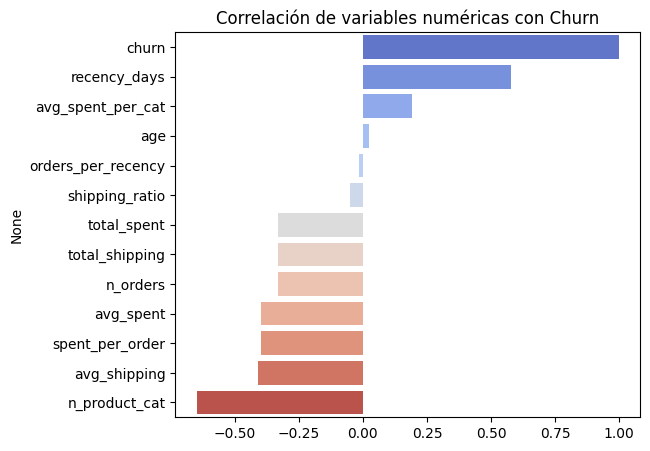

In [9]:
# Correlaciones numéricas con churn
#Esto te permite identificar cuáles variables podrían predecir mejor el abandono.

corr = dataset.corr(numeric_only=True)['churn'].sort_values(ascending=False)
plt.figure(figsize=(6,5))
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.title('Correlación de variables numéricas con Churn')
plt.show()


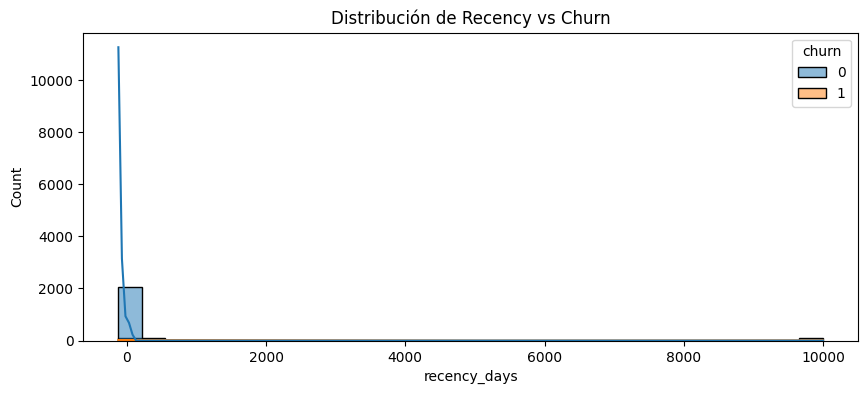

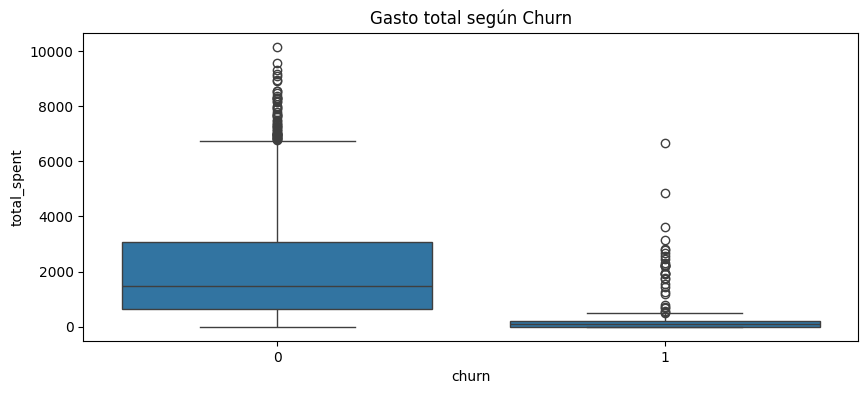

In [10]:
plt.figure(figsize=(10,4))
sns.histplot(data=dataset, x='recency_days', hue='churn', kde=True, bins=30)
plt.title('Distribución de Recency vs Churn')
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(data=dataset, x='churn', y='total_spent')
plt.title('Gasto total según Churn')
plt.show()


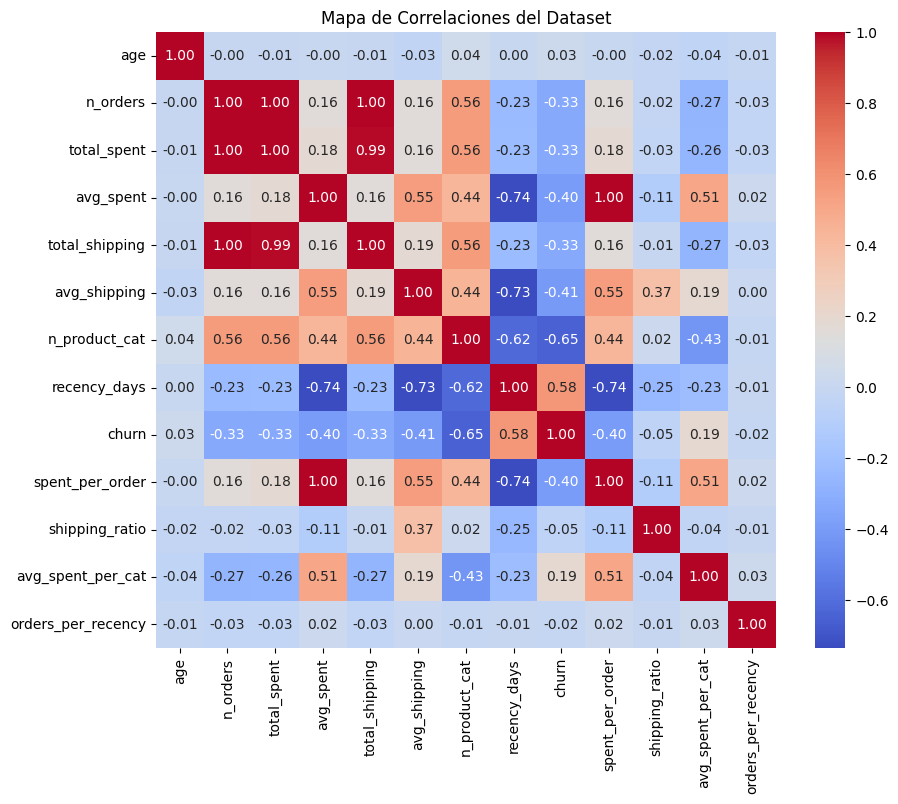

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlaciones del Dataset')
plt.show()


In [21]:
# === IMPORTS GENERALES ===
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    roc_auc_score, f1_score, precision_recall_curve,
    classification_report, confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
# --- Feature engineering esencial ---
dataset = dataset.copy()

# por si faltan:
dataset['spent_per_order']   = dataset['total_spent']   / (dataset['n_orders'] + 1e-6)
dataset['shipping_ratio']    = dataset['total_shipping'] / (dataset['total_spent'] + 1e-6)
dataset['avg_spent_per_cat'] = dataset['avg_spent']     / (dataset['n_product_cat'] + 1e-6)
dataset['orders_per_recency']= dataset['n_orders']       / (dataset['recency_days'].abs() + 1e-6)

# segmentito de edad útil como categórica
if 'age_group' not in dataset.columns:
    dataset['age_group'] = pd.cut(
        dataset['age'], bins=[17,30,45,60,100],
        labels=['Joven','Adulto','Medio','Senior']
    )


In [23]:
base_df = dataset.copy()

def make_dataset(df, name, horizon=90, include_shipping=True, include_ratios=True):
    d = df.copy()
    # definimos churn del experimento
    d['churn'] = ((d['last_order'].isna()) | (d['recency_days'] > horizon)).astype(int)

    drop_cols = []
    if not include_shipping:
        drop_cols += ['total_shipping','avg_shipping']
    if not include_ratios:
        drop_cols += ['spent_per_order','shipping_ratio','avg_spent_per_cat','orders_per_recency']

    d = d.drop(columns=drop_cols, errors='ignore')
    print(f"{name:16s} -> shape={d.shape}, churn={d['churn'].mean():.2%}")
    return d

ds1 = make_dataset(base_df, "DS1_H90_base",   horizon=90,  include_shipping=True,  include_ratios=True)
ds2 = make_dataset(base_df, "DS2_H60",        horizon=60,  include_shipping=True,  include_ratios=True)
ds3 = make_dataset(base_df, "DS3_H120",       horizon=120, include_shipping=True,  include_ratios=True)
ds4 = make_dataset(base_df, "DS4_no_ship",    horizon=90,  include_shipping=False, include_ratios=True)
ds5 = make_dataset(base_df, "DS5_no_ratios",  horizon=90,  include_shipping=True,  include_ratios=False)

datasets = {
    "DS1_H90_base": ds1,
    "DS2_H60": ds2,
    "DS3_H120": ds3,
    "DS4_no_ship": ds4,
    "DS5_no_ratios": ds5
}


DS1_H90_base     -> shape=(2357, 18), churn=13.45%
DS2_H60          -> shape=(2357, 18), churn=14.72%
DS3_H120         -> shape=(2357, 18), churn=12.47%
DS4_no_ship      -> shape=(2357, 16), churn=13.45%
DS5_no_ratios    -> shape=(2357, 14), churn=13.45%


In [24]:
def build_preprocessor(X):
    num_cols = X.select_dtypes(include='number').columns.tolist()
    cat_cols = X.select_dtypes(exclude='number').columns.tolist()
    # quitamos columnas que nunca son features
    for c in ['client_id','last_order']:
        if c in num_cols: num_cols.remove(c)
        if c in cat_cols: cat_cols.remove(c)

    pre = ColumnTransformer([
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])
    return pre, num_cols, cat_cols

def best_threshold(y_true, y_proba):
    p, r, thr = precision_recall_curve(y_true, y_proba)
    f1 = 2*p*r/(p+r+1e-9)
    k = np.argmax(f1)
    return (thr[k-1] if k>0 else 0.5), f1[k]


In [25]:
models = {
    "LogReg": LogisticRegression(max_iter=2000, class_weight='balanced'),
    "RF":     RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced'),
    "GB":     GradientBoostingClassifier(random_state=42)
}

rows = []

for dname, df in datasets.items():
    # X/y
    X = df.drop(columns=['churn'])
    y = df['churn'].astype(int)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    pre, num_cols, cat_cols = build_preprocessor(X_train)

    for mname, model in models.items():
        pipe = Pipeline([('prep', pre), ('model', model)])
        pipe.fit(X_train, y_train)
        proba = pipe.predict_proba(X_test)[:,1]
        thr, f1b = best_threshold(y_test, proba)
        pred = (proba >= thr).astype(int)

        rows.append({
            "dataset": dname,
            "modelo": mname,
            "ROC_AUC": roc_auc_score(y_test, proba),
            "F1_best": f1b,
            "best_thr": float(thr),
            "churn_rate_test": float(y_test.mean())
        })

leaderboard = pd.DataFrame(rows).sort_values(['ROC_AUC','F1_best'], ascending=False).reset_index(drop=True)
leaderboard


,dataset,modelo,ROC_AUC,F1_best,best_thr,churn_rate_test
0,DS1_H90_base,GB,1.000000,1.000000,0.000006,0.134181
1,DS2_H60,RF,1.000000,1.000000,0.360000,0.146893
2,DS2_H60,GB,1.000000,1.000000,0.000007,0.146893
3,DS3_H120,RF,1.000000,1.000000,0.406667,0.124294
4,DS3_H120,GB,1.000000,1.000000,0.000006,0.124294
5,DS4_no_ship,GB,1.000000,1.000000,0.000006,0.134181
6,DS5_no_ratios,RF,1.000000,1.000000,0.253333,0.134181
7,DS5_no_ratios,GB,1.000000,1.000000,0.000006,0.134181
8,DS4_no_ship,RF,0.999983,0.994764,0.290000,0.134181
9,DS1_H90_base,RF,0.999914,0.994709,0.350000,0.134181


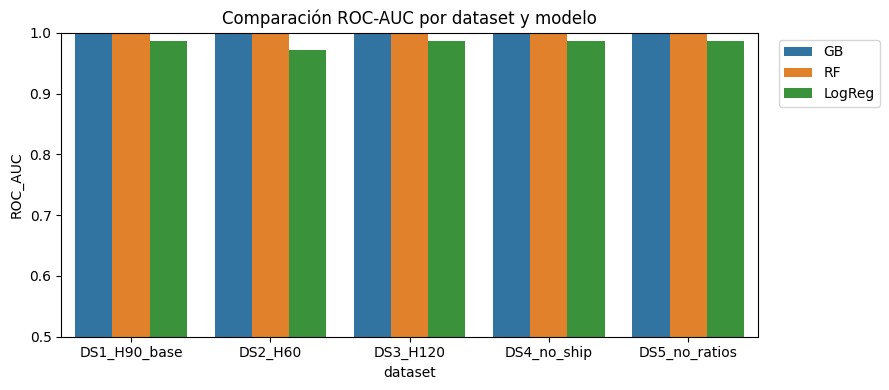

In [26]:
plt.figure(figsize=(9,4))
sns.barplot(data=leaderboard, x='dataset', y='ROC_AUC', hue='modelo')
plt.title('Comparación ROC-AUC por dataset y modelo')
plt.ylim(0.5, 1.0)
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()


In [27]:
best = leaderboard.iloc[0]
best


dataset            DS1_H90_base
modelo                       GB
ROC_AUC                     1.0
F1_best                     1.0
best_thr               0.000006
churn_rate_test        0.134181
Name: 0, dtype: object

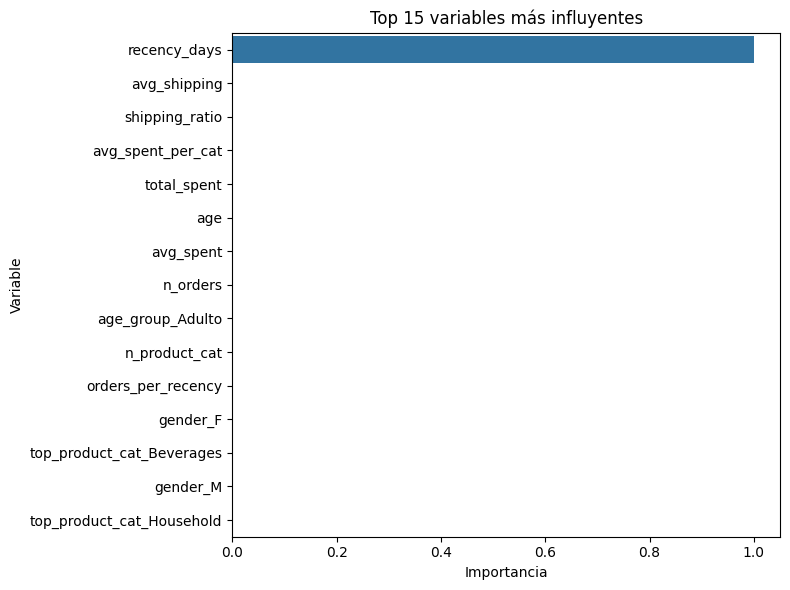

In [29]:
# Re-entrenar el ganador para explicar variables
df_best = datasets[best['dataset']]
X = df_best.drop(columns=['churn'])
y = df_best['churn'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

pre, num_cols, cat_cols = build_preprocessor(X_train)

if best['modelo'] == 'RF':
    chosen = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced')
elif best['modelo'] == 'GB':
    chosen = GradientBoostingClassifier(random_state=42)
else:
    chosen = LogisticRegression(max_iter=2000, class_weight='balanced')

pipe = Pipeline([('prep', pre), ('model', chosen)])
pipe.fit(X_train, y_train)

# Importancias (si el modelo las tiene)
if hasattr(chosen, 'feature_importances_'):
    # nombres después del preprocesamiento
    ohe = pipe.named_steps['prep'].named_transformers_['cat']
    cat_names = ohe.get_feature_names_out(cat_cols) if len(cat_cols) else []
    feat_names = list(num_cols) + list(cat_names)

    imps = chosen.feature_importances_
    imp_df = pd.DataFrame({'Variable': feat_names, 'Importancia': imps}).sort_values('Importancia', ascending=False).head(15)

    plt.figure(figsize=(8,6))
    sns.barplot(data=imp_df, x='Importancia', y='Variable')
    plt.title('Top 15 variables más influyentes')
    plt.tight_layout()
    plt.show()
else:
    print("El modelo elegido no expone feature_importances_.")


In [32]:
# ================================================
# 🔁 REENTRENAMIENTO SIN RECENCY_DAYS
# ================================================

# 1️⃣ Creamos nuevas versiones de los datasets sin recency_days
datasets_no_rec = {name: df.drop(columns=['recency_days'], errors='ignore') 
                   for name, df in datasets.items()}

rows_no_rec = []

for dname, df in datasets_no_rec.items():
    X = df.drop(columns=['churn'])
    y = df['churn'].astype(int)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )
    
    pre, num_cols, cat_cols = build_preprocessor(X_train)
    
    for mname, model in models.items():
        pipe = Pipeline([('prep', pre), ('model', model)])
        pipe.fit(X_train, y_train)
        proba = pipe.predict_proba(X_test)[:,1]
        thr, f1b = best_threshold(y_test, proba)
        pred = (proba >= thr).astype(int)

        rows_no_rec.append({
            "dataset": dname,
            "modelo": mname,
            "ROC_AUC": roc_auc_score(y_test, proba),
            "F1_best": f1b,
            "best_thr": float(thr),
            "churn_rate_test": float(y_test.mean())
        })

leaderboard_no_rec = pd.DataFrame(rows_no_rec).sort_values(['ROC_AUC','F1_best'], ascending=False).reset_index(drop=True)
leaderboard_no_rec


,dataset,modelo,ROC_AUC,F1_best,best_thr,churn_rate_test
0,DS3_H120,GB,0.995491,0.965116,0.242588,0.124294
1,DS3_H120,RF,0.987106,0.901235,0.536667,0.124294
2,DS4_no_ship,GB,0.981180,0.880435,0.320799,0.134181
3,DS1_H90_base,GB,0.979497,0.885246,0.431855,0.134181
4,DS2_H60,GB,0.975086,0.910000,0.422797,0.146893
5,DS1_H90_base,RF,0.966764,0.829787,0.420000,0.134181
6,DS2_H60,RF,0.965797,0.861538,0.413333,0.146893
7,DS4_no_ship,RF,0.959260,0.829016,0.366667,0.134181
8,DS1_H90_base,LogReg,0.909213,0.660465,0.660232,0.134181
9,DS4_no_ship,LogReg,0.909196,0.663551,0.669515,0.134181


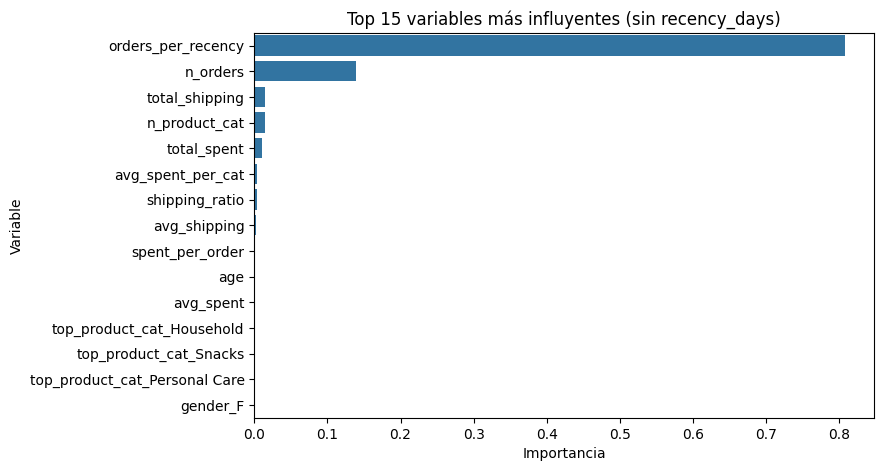

In [33]:
# ================================================
# 🔎 IMPORTANCIAS SIN RECENCY_DAYS
# ================================================

# Tomamos el mejor modelo (GB) sobre el mejor dataset (DS3_H120)
dname_best = 'DS3_H120'
model_best = GradientBoostingClassifier(random_state=42)

df = datasets_no_rec[dname_best]
X = df.drop(columns=['churn'])
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

pre, num_cols, cat_cols = build_preprocessor(X_train)
pipe = Pipeline([('prep', pre), ('model', model_best)])
pipe.fit(X_train, y_train)

# Importancias
importances = pipe.named_steps['model'].feature_importances_
feat_names = num_cols + list(pipe.named_steps['prep']
                             .named_transformers_['cat']
                             .get_feature_names_out(cat_cols))
imp_df = pd.DataFrame({'Variable': feat_names, 'Importancia': importances})
imp_df = imp_df.sort_values('Importancia', ascending=False).head(15)

# Gráfico
plt.figure(figsize=(8,5))
sns.barplot(data=imp_df, x='Importancia', y='Variable')
plt.title('Top 15 variables más influyentes (sin recency_days)')
plt.show()


Accuracy: 0.9067796610169492  | Average Precision: 0.6903504957912534
Confusion Matrix:
 [[588  32]
 [ 34  54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       620
           1       0.63      0.61      0.62        88

    accuracy                           0.91       708
   macro avg       0.79      0.78      0.78       708
weighted avg       0.91      0.91      0.91       708



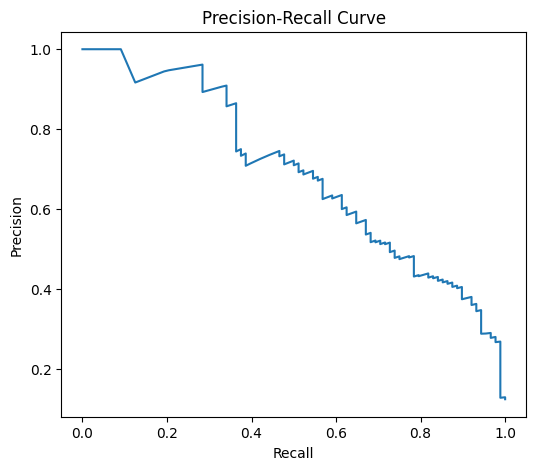

In [34]:
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, confusion_matrix, classification_report

pred = (proba >= thr).astype(int)

# Accuracy
acc = accuracy_score(y_test, pred)

# Precision-Recall Curve + Average Precision
prec, rec, pr_thresh = precision_recall_curve(y_test, proba)
ap = average_precision_score(y_test, proba)

# Matriz de confusión y reporte
cm = confusion_matrix(y_test, pred)
print("Accuracy:", acc, " | Average Precision:", ap)
print("Confusion Matrix:\n", cm)
print(classification_report(y_test, pred))

# Plot PR curve
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.plot(rec, prec)
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [37]:

from pathlib import Path
import mlflow, os

# Carpeta local dentro del repo para guardar los runs
mlruns_path = (Path.cwd() / "notebooks" / "mlruns").resolve()
mlruns_path.mkdir(parents=True, exist_ok=True)

# ✅ URI válida para Windows (file:///C:/...):
tracking_uri = mlruns_path.as_uri()          # p.ej. 'file:///C:/Users/.../notebooks/mlruns'
mlflow.set_tracking_uri(tracking_uri)

# Crear/usar el experimento
mlflow.set_experiment("churn_tp2")

print("MLflow tracking_uri =", tracking_uri)
print("Existe mlruns?:", mlruns_path.exists())


2025/11/12 12:55:25 INFO mlflow.tracking.fluent: Experiment with name 'churn_tp2' does not exist. Creating a new experiment.


MLflow tracking_uri = file:///C:/Users/59899/OneDrive/semestre%204/GGD/notebooks/notebooks/mlruns
Existe mlruns?: True


In [38]:
with mlflow.start_run(run_name=f"{dname}_{mname}"):
    mlflow.set_tags({
        "dataset": dname,
        "modelo": mname,
        "horizon": dname.split("_")[1] if "_" in dname else "NA",
        "sin_recency": str('recency_days' not in X.columns)
    })
    # ... entrenás, calculás métricas y haces mlflow.log_metric / log_param / log_model


In [39]:
import os, json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_auc_score, f1_score, accuracy_score, average_precision_score,
    precision_recall_curve, roc_curve, confusion_matrix
)
import mlflow, mlflow.sklearn

# --- paths ---
REPORTS = Path("reports"); REPORTS.mkdir(exist_ok=True)

def plot_and_save_pr(y_true, y_proba, outpath):
    prec, rec, _ = precision_recall_curve(y_true, y_proba)
    plt.figure(figsize=(5,4))
    plt.plot(rec, prec)
    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.title("Precision–Recall")
    plt.tight_layout(); plt.savefig(outpath); plt.close()
    return average_precision_score(y_true, y_proba)

def plot_and_save_roc(y_true, y_proba, outpath):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr)
    plt.plot([0,1],[0,1],'--',lw=1)
    plt.xlabel("FPR"); plt.ylabel("TPR")
    plt.title("ROC Curve")
    plt.tight_layout(); plt.savefig(outpath); plt.close()

def plot_and_save_cm(y_true, y_pred, outpath):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.title("Matriz de confusión"); plt.xlabel("Pred"); plt.ylabel("True")
    plt.tight_layout(); plt.savefig(outpath); plt.close()

def run_suite(dsets: dict, suite_name: str):
    rows=[]
    for dname, df in dsets.items():
        X = df.drop(columns=['churn'])
        y = df['churn'].astype(int)

        Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
        pre, num_cols, cat_cols = build_preprocessor(Xtr)

        for mname, model in models.items():
            run_id = f"{suite_name}_{dname}_{mname}"
            pipe = Pipeline([('prep', pre), ('model', model)])
            pipe.fit(Xtr, ytr)
            proba = pipe.predict_proba(Xte)[:,1]
            thr, f1b = best_threshold(yte, proba)
            pred = (proba >= thr).astype(int)

            roc = roc_auc_score(yte, proba)
            acc = accuracy_score(yte, pred)
            ap  = average_precision_score(yte, proba)

            # guardar gráficos
            pr_png  = REPORTS / f"PR_{run_id}.png"
            roc_png = REPORTS / f"ROC_{run_id}.png"
            cm_png  = REPORTS / f"CM_{run_id}.png"
            plot_and_save_pr(yte, proba, pr_png)
            plot_and_save_roc(yte, proba, roc_png)
            plot_and_save_cm(yte, pred, cm_png)

            # log MLflow
            with mlflow.start_run(run_name=run_id):
                mlflow.set_tags({
                    "suite": suite_name,
                    "dataset": dname,
                    "modelo": mname,
                    "horizon": dname.split("_")[1] if "_" in dname else "NA",
                    "sin_recency": str('recency_days' not in X.columns),
                })
                mlflow.log_metric("roc_auc", roc)
                mlflow.log_metric("f1_best", f1b)
                mlflow.log_metric("accuracy", acc)
                mlflow.log_metric("avg_precision", ap)
                mlflow.log_metric("best_threshold", float(thr))
                mlflow.log_metric("churn_rate_test", float(yte.mean()))
                mlflow.log_param("n_features", X.shape[1])
                mlflow.log_param("features", ",".join(X.columns))
                mlflow.sklearn.log_model(pipe, artifact_path="model")
                mlflow.log_artifact(str(pr_png))
                mlflow.log_artifact(str(roc_png))
                mlflow.log_artifact(str(cm_png))

            rows.append({
                "suite": suite_name, "dataset": dname, "modelo": mname,
                "ROC_AUC": roc, "F1_best": f1b, "Accuracy": acc, "AvgPrecision": ap,
                "best_thr": float(thr), "churn_rate_test": float(yte.mean())
            })

    dfres = pd.DataFrame(rows).sort_values(['ROC_AUC','F1_best'], ascending=False).reset_index(drop=True)
    csv_path = REPORTS / f"leaderboard_{suite_name}.csv"
    dfres.to_csv(csv_path, index=False)
    display(dfres.head(15))
    print("Leaderboard guardado en:", csv_path)
    return dfres

# === correr suites ===
lb_with_rec = run_suite(datasets, "with_recency")
lb_no_rec   = run_suite(datasets_no_rec, "no_recency")



2025/11/12 12:57:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/12 12:57:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/12 12:57:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/12 12:57:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/12 12:57:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/12 12:57:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/12 12:57:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use 

,suite,dataset,modelo,ROC_AUC,F1_best,Accuracy,AvgPrecision,best_thr,churn_rate_test
0,with_recency,DS1_H90_base,GB,1.000000,1.000000,0.134181,1.000000,0.000006,0.134181
1,with_recency,DS2_H60,RF,1.000000,1.000000,0.998588,1.000000,0.360000,0.146893
2,with_recency,DS2_H60,GB,1.000000,1.000000,0.146893,1.000000,0.000007,0.146893
3,with_recency,DS3_H120,RF,1.000000,1.000000,0.998588,1.000000,0.406667,0.124294
4,with_recency,DS3_H120,GB,1.000000,1.000000,0.443503,1.000000,0.000006,0.124294
5,with_recency,DS4_no_ship,GB,1.000000,1.000000,0.134181,1.000000,0.000006,0.134181
6,with_recency,DS5_no_ratios,RF,1.000000,1.000000,0.998588,1.000000,0.253333,0.134181
7,with_recency,DS5_no_ratios,GB,1.000000,1.000000,0.134181,1.000000,0.000006,0.134181
8,with_recency,DS4_no_ship,RF,0.999983,0.994764,0.997175,0.999890,0.290000,0.134181
9,with_recency,DS1_H90_base,RF,0.999914,0.994709,0.997175,0.999474,0.350000,0.134181


Leaderboard guardado en: reports\leaderboard_with_recency.csv


2025/11/12 12:59:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/12 12:59:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/12 12:59:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/12 12:59:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/12 12:59:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/12 12:59:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/12 12:59:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use 

,suite,dataset,modelo,ROC_AUC,F1_best,Accuracy,AvgPrecision,best_thr,churn_rate_test
0,no_recency,DS3_H120,GB,0.995491,0.965116,0.990113,0.981473,0.242588,0.124294
1,no_recency,DS3_H120,RF,0.987106,0.901235,0.975989,0.958531,0.536667,0.124294
2,no_recency,DS4_no_ship,GB,0.981180,0.880435,0.967514,0.942972,0.320799,0.134181
3,no_recency,DS1_H90_base,GB,0.979497,0.885246,0.968927,0.939389,0.431855,0.134181
4,no_recency,DS2_H60,GB,0.975086,0.910000,0.973164,0.949198,0.422797,0.146893
5,no_recency,DS1_H90_base,RF,0.966764,0.829787,0.953390,0.888529,0.420000,0.134181
6,no_recency,DS2_H60,RF,0.965797,0.861538,0.960452,0.915699,0.413333,0.146893
7,no_recency,DS4_no_ship,RF,0.959260,0.829016,0.951977,0.885111,0.366667,0.134181
8,no_recency,DS1_H90_base,LogReg,0.909213,0.660465,0.895480,0.731308,0.660232,0.134181
9,no_recency,DS4_no_ship,LogReg,0.909196,0.663551,0.896893,0.731746,0.669515,0.134181


Leaderboard guardado en: reports\leaderboard_no_recency.csv


In [ ]:
def explain_best(leaderboard_df):
    best = leaderboard_df.iloc[0]
    print("Mejor combinación:", best.to_dict())

    dname = best['dataset']
    mname = best['modelo']
    df = (datasets if "with" in best['suite'] else datasets_no_rec)[dname]

    X = df.drop(columns=['churn']); y = df['churn'].astype(int)
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

    pre, num_cols, cat_cols = build_preprocessor(Xtr)
    if mname == "RF":
        model = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced')
    elif mname == "GB":
        model = GradientBoostingClassifier(random_state=42)
    else:
        model = LogisticRegression(max_iter=2000, class_weight='balanced')

    pipe = Pipeline([('prep', pre), ('model', model)])
    pipe.fit(Xtr, ytr)

    if hasattr(model, "feature_importances_"):
        ohe = pipe.named_steps['prep'].named_transformers_['cat']
        cat_names = ohe.get_feature_names_out(cat_cols) if len(cat_cols) else []
        feat_names = list(num_cols) + list(cat_names)
        imps = model.feature_importances_
        imp_df = pd.DataFrame({"Variable": feat_names, "Importancia": imps}).sort_values("Importancia", ascending=False).head(15)
        out = REPORTS / f"importancias_{best['suite']}_{dname}_{mname}.png"
        plt.figure(figsize=(8,5)); sns.barplot(data=imp_df, x="Importancia", y="Variable"); plt.title("Top 15 variables"); plt.tight_layout(); plt.savefig(out); plt.close()
        print("Importancias guardadas en:", out)
        display(imp_df)
    else:
        print("El modelo elegido no expone importancias.")

explain_best(lb_with_rec)
explain_best(lb_no_rec)
